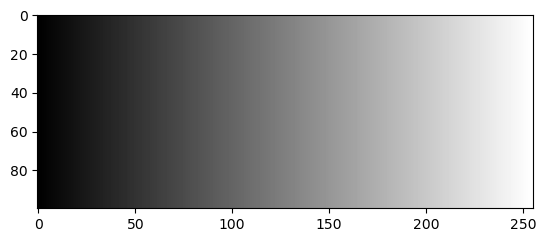

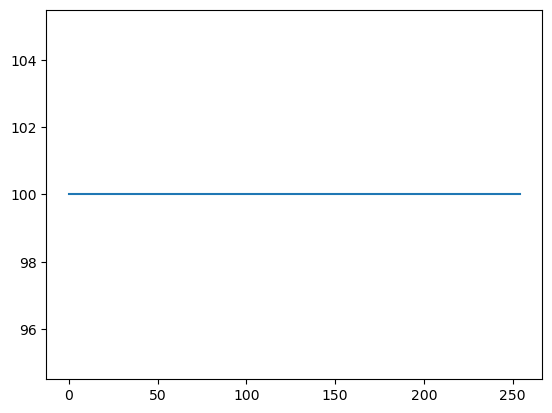

In [6]:
## Task 1:
import numpy as np
import matplotlib.pyplot as plt
import cv2

M = np.zeros([100,256], dtype='uint8')

for y in range(0,256):
       M[:,y]= y

hist = cv2.calcHist([M], [0], None, [255], [0,255])

plt.imshow(M,cmap='gray')
plt.show()

plt.plot(hist)
plt.show()

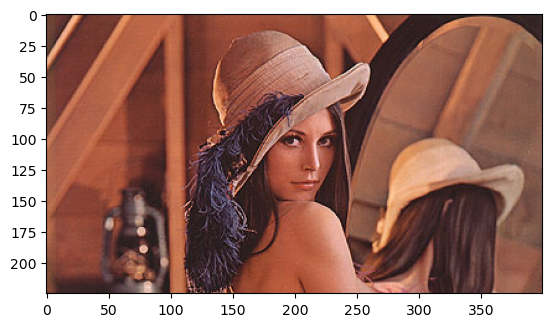

In [7]:
## Task 2:

import numpy as np
import matplotlib.pyplot as plt
import cv2

BGR_IMAGE = cv2.imread('../Practice-Images/lena.jpg')

# Using OpenCV
blueChannel = BGR_IMAGE[:,:,0]
greenChannel = BGR_IMAGE[:,:,1]
redChannel = BGR_IMAGE[:,:,2]

RGB_IMAGE = cv2.merge((redChannel,greenChannel,blueChannel))

# Using Numpy
rgb_img2 = np.zeros(RGB_IMAGE.shape,dtype='uint8')
rgb_img2[:,:,0] = redChannel
rgb_img2[:,:,1] = greenChannel
rgb_img2[:,:,2] = blueChannel

# Shortcut Method:
rgb_image3 = BGR_IMAGE[:,:,::-1]

rgb_image4 = BGR_IMAGE[:,:,[2,1,0]]
plt.imshow(rgb_img2)
plt.show()

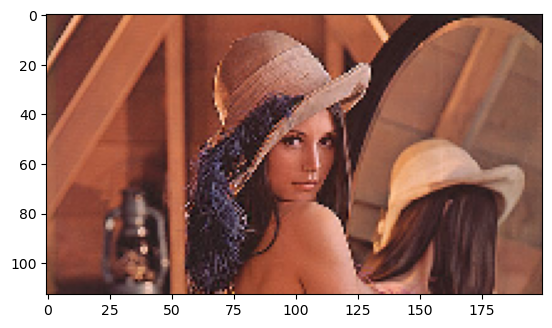

In [8]:
# Task 3:
# Down-Sampling:
BGR_IMAGE = cv2.imread('../Practice-Images/lena.jpg')

BGR_IMAGE = BGR_IMAGE[::2,::2]

RGB_IMAGE = cv2.cvtColor(BGR_IMAGE,cv2.COLOR_BGR2RGB)

plt.imshow(RGB_IMAGE)
plt.show()

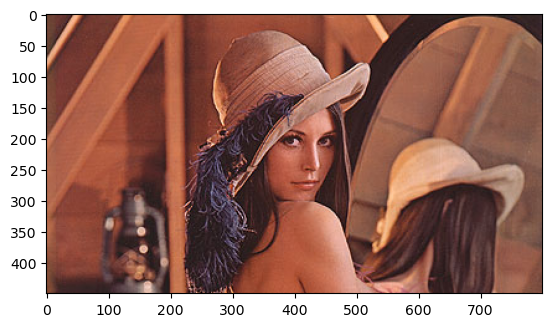

In [9]:
# Task 4:
# Up-Sampling:

import numpy as np

BGR_IMAGE = cv2.imread('../Practice-Images/lena.jpg')
RGB_IMAGE = cv2.cvtColor(BGR_IMAGE, cv2.COLOR_BGR2RGB)

height,width,_ = RGB_IMAGE.shape
newHeight= height*2
newWidth= width*2

longer = np.zeros((newHeight,width,3), np.uint8)

for y in range(height):
       longer[y*2] = RGB_IMAGE[y]
       longer[(y*2)+1] = RGB_IMAGE[y]

longer_wider = np.zeros((newHeight,newWidth,3), np.uint8)

for x in range(width):
       longer_wider[:,x*2] = longer[:,x]
       longer_wider[:,(x*2)+1] = longer[:,x]

plt.imshow(longer_wider)
plt.show()

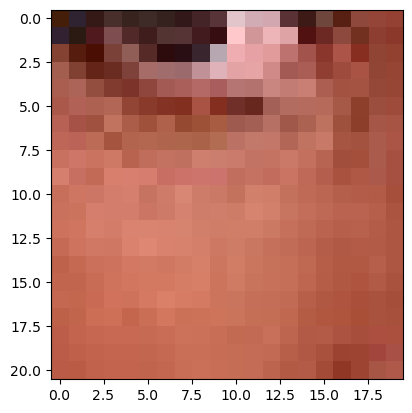

In [4]:
# Task 5:

import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('../Practice-Images/lena.jpg')
mod_img = image.copy()

def nothing(x):
    pass

# Creating a Window:
cv2.namedWindow('imageCropper')

# Creating trackbars:
cv2.createTrackbar('Left','imageCropper',1,int(image.shape[1]/2 - 10),nothing)
cv2.createTrackbar('Right','imageCropper',1,int(image.shape[1]/2 - 10),nothing)
cv2.createTrackbar('Top','imageCropper',1,int(image.shape[0]/2 - 10),nothing)
cv2.createTrackbar('Bottom','imageCropper',1,int(image.shape[0]/2 - 10),nothing)

while True:
    # Get Positions:
    l = cv2.getTrackbarPos('Left', 'imageCropper')
    r = cv2.getTrackbarPos('Right', 'imageCropper')
    t = cv2.getTrackbarPos('Top', 'imageCropper')
    b = cv2.getTrackbarPos('Bottom', 'imageCropper')

    if l <= 1:
        l = 1
    if r <= 1:
        r = 1
    if t <= 1:
        t = 1
    if b <= 1:
        b = 1

    mod_img=image[t:-b,l:-r,:]

    cv2.imshow('imageCropper', mod_img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

for i in range(1,5):
    cv2.waitKey(1)

imageC = cv2.cvtColor(mod_img, cv2.COLOR_BGR2RGB)
plt.imshow(imageC)
plt.show()